Intro

Metric Explanation

Safety - 70%
https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f
- Arrest Data

Entertainment - 10%


Quality of Life - 30%
https://data.wprdc.org/dataset/allegheny-county-air-quality
- Air Quality 
https://data.wprdc.org/dataset/pittsburgh-pli-violations-report
- Violations

Data Analysis Part 1 - Safety

In [39]:
import pandas as pd

# Load the arrests data
arrest_data = pd.read_csv('arrests.csv')

# Load the population data
pop_data = pd.read_csv('Population.csv')  # Replace with the actual path to your population data

# Drop any rows with missing values
arrest_data.dropna(inplace=True)

# Convert relevant columns to appropriate data types
arrest_data['INCIDENTNEIGHBORHOOD'] = arrest_data['INCIDENTNEIGHBORHOOD'].astype(str)

# Count the number of arrests per neighborhood
neighborhood_arrests = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
neighborhood_arrests.columns = ['Neighborhood', 'Arrests']

# Select relevant columns from population data
pop_data = pop_data[['Neighborhood', '2020_Total_Population']]
pop_data.rename(columns={'2020_Total_Population': 'Population'}, inplace=True)

# Merge with neighborhood population data
merged_data = pd.merge(neighborhood_arrests, pop_data, on='Neighborhood')

# Calculate arrests per capita
merged_data['Arrests_Per_Capita'] = merged_data['Arrests'] / merged_data['Population']

# Sort by arrests per capita and get the top 10 safest neighborhoods
top_10_safest = merged_data.nsmallest(10, 'Arrests_Per_Capita')

# Print the top 10 safest neighborhoods with rankings and more descriptive output
for rank, (index, row) in enumerate(top_10_safest.iterrows(), start=1):
    print(f"Rank {rank}: {row['Neighborhood']}")
    print(f"  - Population: {row['Population']}")
    print(f"  - Total Arrests: {row['Arrests']}")
    print(f"  - Arrests per Capita: {row['Arrests_Per_Capita']:.6f}")
    print()  # Print a new line for better readability


Rank 1: Central Northside
  - Population: 2972
  - Total Arrests: 23
  - Arrests per Capita: 0.007739

Rank 2: Swisshelm Park
  - Population: 1339
  - Total Arrests: 28
  - Arrests per Capita: 0.020911

Rank 3: Squirrel Hill North
  - Population: 11879
  - Total Arrests: 267
  - Arrests per Capita: 0.022477

Rank 4: Regent Square
  - Population: 971
  - Total Arrests: 25
  - Arrests per Capita: 0.025747

Rank 5: New Homestead
  - Population: 917
  - Total Arrests: 28
  - Arrests per Capita: 0.030534

Rank 6: North Oakland
  - Population: 10691
  - Total Arrests: 340
  - Arrests per Capita: 0.031802

Rank 7: Stanton Heights
  - Population: 4427
  - Total Arrests: 200
  - Arrests per Capita: 0.045177

Rank 8: Squirrel Hill South
  - Population: 15317
  - Total Arrests: 733
  - Arrests per Capita: 0.047855

Rank 9: Point Breeze
  - Population: 5348
  - Total Arrests: 270
  - Arrests per Capita: 0.050486

Rank 10: East Carnegie
  - Population: 491
  - Total Arrests: 25
  - Arrests per Capi

Results Visualization - Part 1

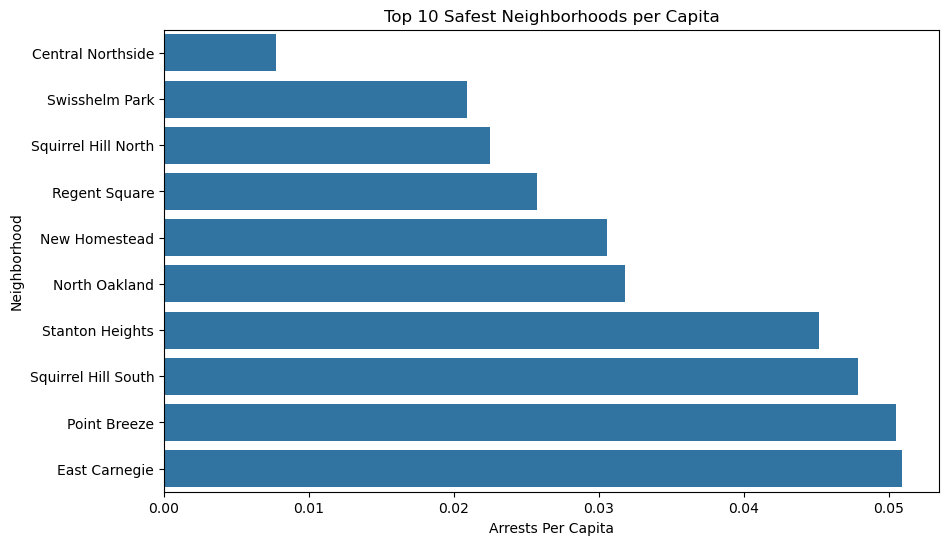

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the arrests data
arrest_data = pd.read_csv('arrests.csv')

# Load the population data
pop_data = pd.read_csv('Population.csv')  # Replace with the actual path to your population data

# Drop any rows with missing values
arrest_data.dropna(inplace=True)

# Convert relevant columns to appropriate data types
arrest_data['INCIDENTNEIGHBORHOOD'] = arrest_data['INCIDENTNEIGHBORHOOD'].astype(str)

# Count the number of arrests per neighborhood
neighborhood_arrests = arrest_data['INCIDENTNEIGHBORHOOD'].value_counts().reset_index()
neighborhood_arrests.columns = ['Neighborhood', 'Arrests']

# Select relevant columns from population data
pop_data = pop_data[['Neighborhood', '2020_Total_Population']]
pop_data.rename(columns={'2020_Total_Population': 'Population'}, inplace=True)

# Merge with neighborhood population data
merged_data = pd.merge(neighborhood_arrests, pop_data, on='Neighborhood')

# Calculate arrests per capita
merged_data['Arrests_Per_Capita'] = merged_data['Arrests'] / merged_data['Population']

# Sort by arrests per capita and get the top 10 safest neighborhoods
top_10_safest = merged_data.nsmallest(10, 'Arrests_Per_Capita')

# Bar Plot of Arrests Per Capita
plt.figure(figsize=(10, 6))
sns.barplot(x='Arrests_Per_Capita', y='Neighborhood', data=top_10_safest)
plt.title('Top 10 Safest Neighborhoods per Capita')
plt.xlabel('Arrests Per Capita')
plt.ylabel('Neighborhood')
plt.show()




Data Analysis Part 2 - Quality of Life

In [86]:
import pandas as pd

# Load the air quality data
air_quality_data = pd.read_csv('AQ.csv')

# Drop any rows with missing values in the 'site' column
air_quality_data.dropna(subset=['site'], inplace=True)

# Convert relevant columns to appropriate data types
air_quality_data['site'] = air_quality_data['site'].astype(str)

# Identify numeric columns (excluding non-numeric ones like date and site, and the _id column)
numeric_columns = air_quality_data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('_id')

# Calculate average values for each numeric air quality parameter per site
avg_air_quality = air_quality_data.groupby('site')[numeric_columns].mean().reset_index()

# Calculate the overall air quality score (e.g., average of all numeric parameters)
air_quality_parameters = numeric_columns.tolist()
avg_air_quality['Overall_Air_Quality'] = avg_air_quality[air_quality_parameters].mean(axis=1)

# Sort by overall air quality (lower values indicate better air quality)
top_10_best_air_quality = avg_air_quality.nsmallest(10, 'Overall_Air_Quality')

# Print the top 10 neighborhoods with their scores
print("Top 10 Neighborhoods with Best Air Quality:")
for rank, (index, row) in enumerate(top_10_best_air_quality.iterrows(), start=1):
    print(f"Rank {rank}: {row['site']} - Overall Air Quality Score: {row['Overall_Air_Quality']:.6f}")


Top 10 Neighborhoods with Best Air Quality:
Rank 1: Lawrenceville 2 - Overall Air Quality Score: 3.049830
Rank 2: West Mifflin - Overall Air Quality Score: 6.335548
Rank 3: Flag Plaza - Overall Air Quality Score: 9.949275
Rank 4: Glassport High Street - Overall Air Quality Score: 17.355108
Rank 5: Liberty - Overall Air Quality Score: 17.901599
Rank 6: North Braddock - Overall Air Quality Score: 18.781354
Rank 7: Parkway East - Overall Air Quality Score: 21.636392
Rank 8: South Fayette - Overall Air Quality Score: 23.838452
Rank 9: Avalon - Overall Air Quality Score: 24.278565
Rank 10: Harrison Township - Overall Air Quality Score: 24.312906


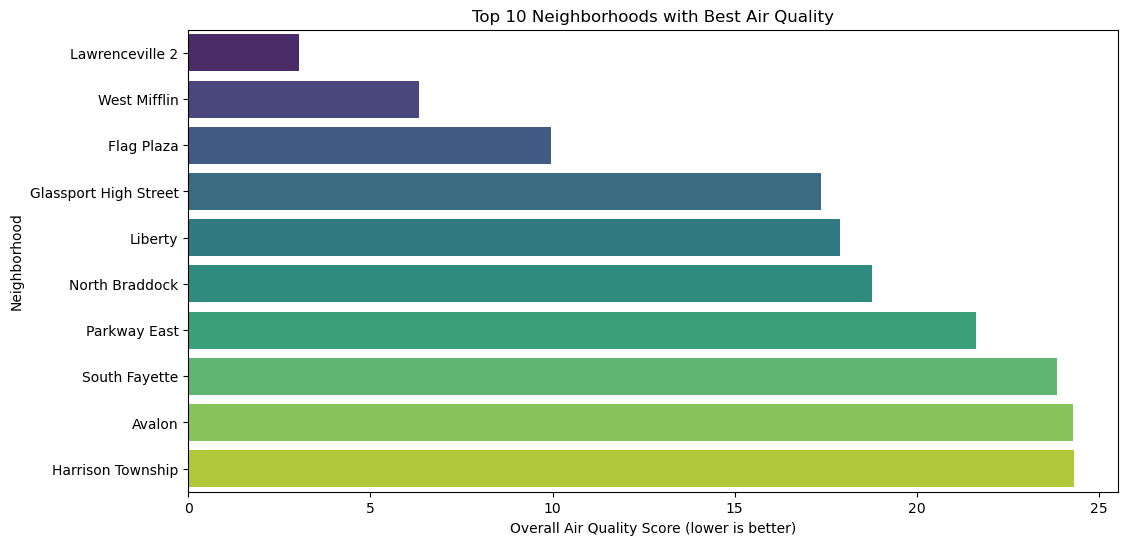

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the air quality data
air_quality_data = pd.read_csv('AQ.csv')

# Drop any rows with missing values in the 'site' column
air_quality_data.dropna(subset=['site'], inplace=True)

# Convert relevant columns to appropriate data types
air_quality_data['site'] = air_quality_data['site'].astype(str)

# Identify numeric columns (excluding non-numeric ones like date and site, and the _id column)
numeric_columns = air_quality_data.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('_id')

# Calculate average values for each numeric air quality parameter per site
avg_air_quality = air_quality_data.groupby('site')[numeric_columns].mean().reset_index()

# Calculate the overall air quality score (e.g., average of all numeric parameters)
air_quality_parameters = numeric_columns.tolist()
avg_air_quality['Overall_Air_Quality'] = avg_air_quality[air_quality_parameters].mean(axis=1)

# Sort by overall air quality (lower values indicate better air quality)
top_10_best_air_quality = avg_air_quality.nsmallest(10, 'Overall_Air_Quality')

# Plot the top 10 neighborhoods with their overall air quality scores
plt.figure(figsize=(12, 6))
sns.barplot(x='Overall_Air_Quality', y='site', data=top_10_best_air_quality, palette='viridis', hue='site', dodge=False)
plt.title('Top 10 Neighborhoods with Best Air Quality')
plt.xlabel('Overall Air Quality Score (lower is better)')
plt.ylabel('Neighborhood')
plt.legend([], [], frameon=False)
plt.show()


In [ ]:
Conclusion